In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image,ImageFilter
import numpy as np
import cv2

In [54]:
im = img.imread('Y1.jpg')

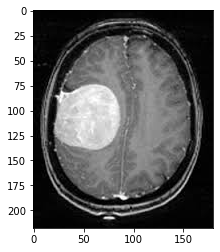

In [55]:
plt.imshow(im)

In [56]:
im.shape

(218, 180, 3)

In [57]:
#Taking weight sum to convert to grayscale
g=0.3*im[:,:,0]+0.6*im[:,:,1]+0.1*im[:,:,2];

In [58]:
g.shape

(218, 180)

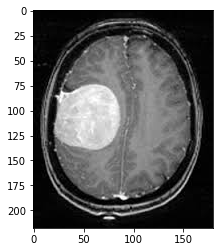

In [59]:
plt.imshow(g,cmap='gray')

In [60]:
g1 = Image.open('Y1.jpg').convert('L')

In [61]:
g1.show()

In [62]:
#guassian filtering
filtered_img = g1.filter(ImageFilter.MedianFilter(size = 3)) 

In [63]:
g1.show()

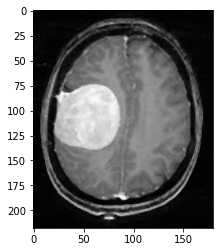

In [64]:
plt.imshow(filtered_img,cmap='gray')

In [65]:
import numpy as np
from scipy.ndimage import convolve

def median_filter(image, filter_size):
   
    pad_size = filter_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+filter_size, j:j+filter_size]
            filtered_image[i, j] = np.median(neighborhood)

    return filtered_image


filter_size = 3


filtered_image = median_filter(g, filter_size)

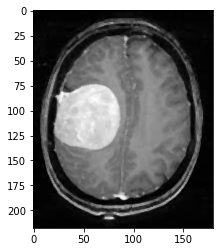

In [66]:
plt.imshow(filtered_image,cmap='gray')

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):

    noisy_image = np.copy(image)

    salt_mask = np.random.rand(*image.shape) < salt_prob
    noisy_image[salt_mask] = 1.0

    
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[pepper_mask] = 0.0

    return noisy_image


salt_probability = 0.02  # Adjust this based on the desired noise level
pepper_probability = 0.02  # Adjust this based on the desired noise level

# Add salt-and-pepper noise
noisy_image = add_salt_and_pepper_noise(g, salt_probability, pepper_probability)




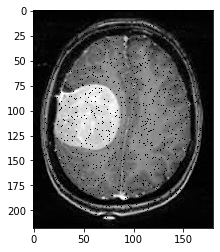

In [68]:
plt.imshow(noisy_image,cmap='gray')

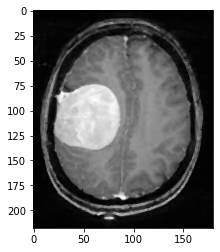

In [69]:
filtered_image = median_filter(noisy_image, 3)
plt.imshow(filtered_image,cmap='gray')

In [70]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def dilation(image, kernel):
    result = np.zeros_like(image)
    rows, cols = image.shape
    krows, kcols = kernel.shape

    for i in range(rows):
        for j in range(cols):
            if image[i, j] != 0:
                result[i:i+krows, j:j+kcols] = np.logical_or(result[i:i+krows, j:j+kcols], kernel)

    return result

def erosion(image, kernel):
    result = np.zeros_like(image)
    rows, cols = image.shape
    krows, kcols = kernel.shape

    for i in range(rows):
        for j in range(cols):
            if np.all(image[i:i+krows, j:j+kcols] == kernel):
                result[i, j] = 1

    return result


def opening(image, kernel):
    return dilation(erosion(image, kernel), kernel)

def closing(image, kernel):
    return erosion(dilation(image, kernel), kernel)

In [71]:
def skull_strip_mriz(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_mask = cv2.threshold(original_image, 25, 255, cv2.THRESH_BINARY)

    kernel = np.ones((10, 10), np.uint8)
    eroded_mask = erosion(binary_mask,kernel)
    dilated_mask = dilation(eroded_mask,kernel)

    skull_stripped_image = cv2.bitwise_and(original_image, original_image, mask=dilated_mask)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original MRI Image')

    plt.subplot(1, 3, 2)
    plt.imshow(dilated_mask, cmap='gray')
    plt.title('Dilated Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(skull_stripped_image, cmap='gray')
    plt.title('Skull Stripped Image')

    plt.show()



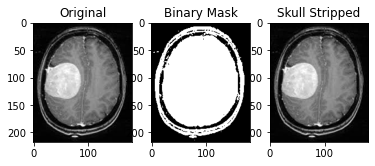

In [72]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def erosion(image, kernel):
    result = np.zeros_like(image)
    rows, cols = image.shape
    krows, kcols = kernel.shape

    for i in range(rows):
        for j in range(cols):
            if i+krows <= rows and j+kcols <= cols:
                window = image[i:i+krows, j:j+kcols]
                if np.all(np.logical_and(window, kernel)):
                    result[i + krows // 2, j + kcols // 2] = 255

    return result

def dilation(image, kernel):
    result = np.zeros_like(image)
    rows, cols = image.shape
    krows, kcols = kernel.shape

    for i in range(rows):
        for j in range(cols):
            if i+krows <= rows and j+kcols <= cols:
                result[i:i+krows, j:j+kcols] = np.logical_or(result[i:i+krows, j:j+kcols], kernel)

    return result

def skull_strip_mriz(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_mask = cv2.threshold(original_image, 25, 255, cv2.THRESH_BINARY)

    kernel = np.ones((10, 10), np.uint8)
    eroded_mask = erosion(binary_mask, kernel)
    dilated_mask = dilation(eroded_mask, kernel)

    skull_stripped_image = cv2.bitwise_and(original_image, original_image, mask=dilated_mask)

    plt.subplot(131), plt.imshow(original_image, 'gray'), plt.title('Original')
    plt.subplot(132), plt.imshow(binary_mask, 'gray'), plt.title('Binary Mask')
    plt.subplot(133), plt.imshow(skull_stripped_image, 'gray'), plt.title('Skull Stripped')

    plt.show()

# Example usage
imgpath = r'C:\Users\ishan\Downloads\Y1.jpg'
skull_strip_mriz(imgpath)


In [73]:
def skull_strip_mri(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_mask = cv2.threshold(original_image, 25, 255, cv2.THRESH_BINARY)

    kernel = np.ones((10, 10), np.uint8)
    eroded_mask = cv2.erode(binary_mask, kernel, iterations=1)
    dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)
    print(kernel)
    skull_stripped_image = cv2.bitwise_and(original_image, original_image, mask=dilated_mask)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original MRI Image')

    plt.subplot(1, 3, 2)
    plt.imshow(dilated_mask, cmap='gray')
    plt.title('Dilated Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(skull_stripped_image, cmap='gray')
    plt.title('Skull Stripped Image')

    plt.show()



In [74]:
imgpath = r'C:\Users\ishan\Downloads\Y1.jpg'

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


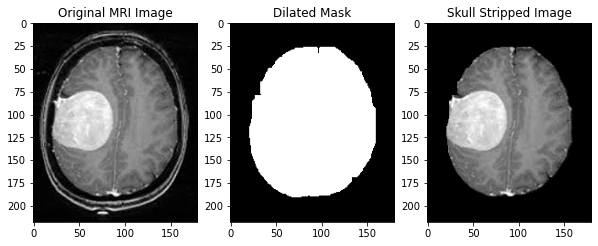

In [75]:
skull_strip_mri(imgpath)

In [99]:
def skull_strip_mri(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_mask = cv2.threshold(original_image, 25, 255, cv2.THRESH_BINARY)

    kernel = np.ones((9,9), np.uint8)
    eroded_mask = cv2.erode(binary_mask, kernel, iterations=1)
    dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

    skull_stripped_image = cv2.bitwise_and(original_image, original_image, mask=dilated_mask)
    
    return skull_stripped_image



In [77]:
imgpath = r'C:\Users\ishan\Downloads\Y1.jpg'

In [78]:
skull_image = skull_strip_mri(imgpath)

In [79]:
high_pass_filtered = cv2.Laplacian(skull_image, cv2.CV_64F)


high_pass_filtered = cv2.normalize(high_pass_filtered, None, 0, 255, cv2.NORM_MINMAX)

high_pass_filtered = np.uint8(high_pass_filtered)


enhanced_image = cv2.addWeighted(skull_image, 1, high_pass_filtered, 0.5, 0)


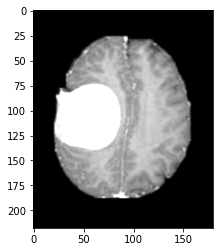

In [80]:
plt.imshow(enhanced_image,cmap='gray')

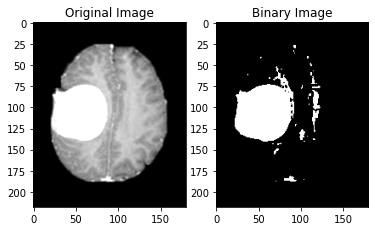

In [81]:
original_image = enhanced_image

# Choose a threshold value (you may need to adjust this based on your image)
threshold_value = 220

# Apply thresholding to convert the image into a binary image
_, binary_image = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the results
plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.show()

In [82]:
binary_image[1][1]

0

In [83]:
enhanced_image.shape[0]

218

In [84]:
tval = 210
bin_img = np.zeros((218,180))
for i in range(enhanced_image.shape[0]):
    for j in range(enhanced_image.shape[1]):
        if(enhanced_image[i][j] > tval):
            bin_img[i][j] = 255
        

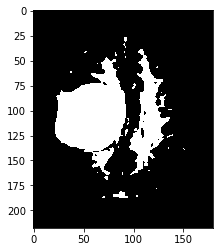

In [85]:
plt.imshow(bin_img,cmap='gray')

In [86]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,kernel, iterations = 2)
opening = opening.astype(np.uint8)

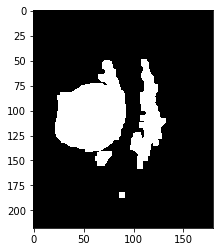

In [87]:
plt.imshow(opening,cmap='gray')

In [88]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

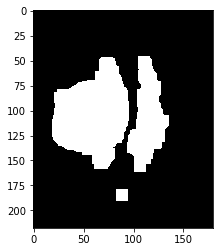

In [89]:
plt.imshow(sure_bg,cmap='gray')

In [90]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

In [91]:
opening.shape

(218, 180)

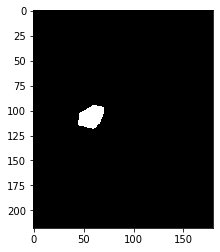

In [92]:
plt.imshow(sure_fg,cmap='gray')

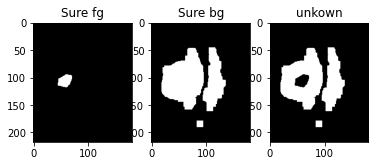

In [93]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.subplot(1, 3, 1)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure fg')

plt.subplot(1, 3, 2)
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure bg')

plt.subplot(1, 3, 3)
plt.imshow(unknown, cmap='gray')
plt.title('unkown')

plt.show()



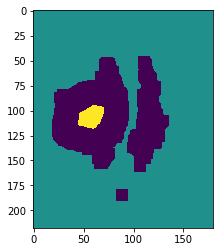

In [94]:
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)

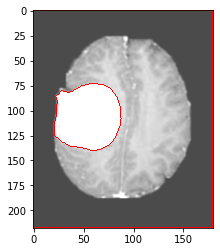

In [95]:
img = original_image
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)

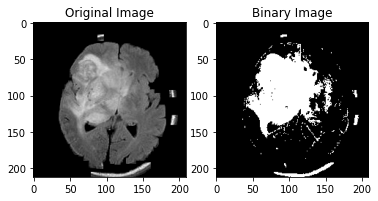

In [100]:
imgpath = r'C:\Users\ishan\Downloads\Y2.jpg'
skull_image = skull_strip_mri(imgpath)
original_image = skull_image

# Choose a threshold value (you may need to adjust this based on your image)
threshold_value = 110

# Apply thresholding to convert the image into a binary image
_, binary_image = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the results
plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.show()

In [101]:
bin_img = binary_image

In [102]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,kernel, iterations = 2)
opening = opening.astype(np.uint8)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

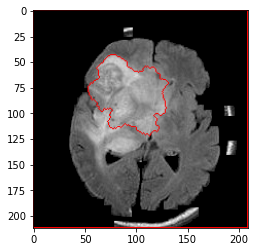

In [103]:
img = original_image
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)

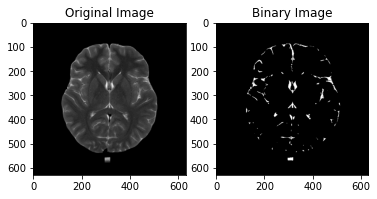

In [48]:
imgpath = r'C:\Users\ishan\Downloads\N1.jpeg'
skull_image = skull_strip_mri(imgpath)
original_image = skull_image

# Choose a threshold value (you may need to adjust this based on your image)
threshold_value = 110

# Apply thresholding to convert the image into a binary image
_, binary_image = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the results
plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.show()

In [49]:
bin_img = binary_image

In [50]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,kernel, iterations = 2)
opening = opening.astype(np.uint8)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

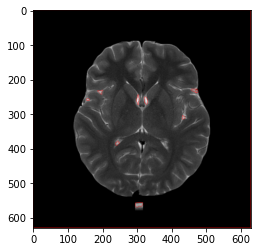

In [139]:
img = original_image
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)